[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/kasparvonbeelen/ghi_python/main?labpath=8_-_Data_Exploration_with_Pandas_I.ipynb)

# Lecture 8: Exploring Tabular Data

## Data Science for Historians (with Python)
## A Gentle Introduction to Working with Data in Python

### Created by Kaspar Beelen and Luke Blaxill

### For the German Historical Institute, London

<img align="left" src="https://www.ghil.ac.uk/typo3conf/ext/wacon_ghil/Resources/Public/Images/institute_icon_small.png">

## 8.0 Overview

In this notebook, we have a closer look at how to work with metadata. Using an example taken from the British Library Catalogue, this notebook demonstrates how to work with tabular data in a programmatic way using the Python library Pandas. 

More precisely, this lecture covers how to:

- load a .CSV file as a Pandas data frame
- select rows in a  data frame
- manipulate values in a  data frame
- sort data frames by column
- make simple plots


## 8.1 Introduction

In this lecture we turn to working with (semi-)structured data. 

We referred to text as 'unstructured' because it Python initially reads the document as sequence of characters. Most of our effort went to wrangling 'raw' text to more meaningful representations, by for example detecting and counting words.

In the coming lectures, we will insepct tabular or structured data. Tabular data consists of **rows** and **columns**. The rows represent individual **records**, which can be basically anything, a book, a measurement, a person... The columns are the **atributes** of these records, they capture the **features** of each observation. 

Spreadsheets are common format for tabular data, documents which you can open and edit with programs such as Microsoft Excel.

Without further ado, let's look at a concrete example: structured metadata from the British Library [catalogue](https://www.bl.uk/collection-metadata/metadata-services).

## 8.2 CSV Data: Metadata on the British Library Books Corpus

In the notebook, we will have a closer look at the [British Library Book corpus](https://www.bl.uk/collection-guides/digitised-printed-books) (BLB). This corpus contains around 60.000 books dating primarily from the 19th century. Its contents are freely accessible and have proved a rich resource for previous and ongoing research projects. 

One problem with this corpus, however, is its composition: while it is large, it remains unclear which types of content have been selected. The criteria remain for inclusion somewhat of a mystery and understanding the contours of the corpus is a non-trivial task that requires additional research at the level of corpus metadata.

We focus therefore on exploring the metadata of this collection that is available as a CSV file. In this notebook, we show you how to explore the BLB metadata and get a better grip on the composition and contours of a large corpus. 

The data is available by following this link: `https://bl.iro.bl.uk/downloads/e1be1324-8b1a-4712-96a7-783ac209ddef?locale=en`. We first inspect the tabular format, and later on, have a more detailed exploration of data frames as a data structure.

In the code below we use the `requests` library to download the data and save it in the `data` variable. We then print the first 400 characters.

In [1]:
import requests # requests library
link = 'https://bl.iro.bl.uk/downloads/e1be1324-8b1a-4712-96a7-783ac209ddef?locale=en' # define location of data with url
data = requests.get(link).text # get text

In [2]:
data[:400]

'BL record ID,Type of resource,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,Country of publication,Place of publication,Publisher,Date of publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,BL record ID for physical resource\n014602826,Monograph,"Yearsley, Ann",1753-1806,person,,'

As you notice, these data are just text: i.e. the metadata is initially just a string. We can confirm this by printing the data `type`.

In [3]:
type(data)

str

But, ho, wait. Didn't you tell us previously we'd be working with **structured** data? Yes, but let's have a look at the data in its 'raw' format first. 

What we printed in the cell above are the column names. You can observe how each name is separated by a comma (`,`). Also, spot the return character `\n` which marks the end of a row. 

While our data is, initially, just a text file, you notice that the BLB metadata has an implicit structure, determined by comma's (cell boundaries) and hard returns (row boundaries). This format is commonly referred to as CSV, i.e. 'Comma Separated Values'. You will encounter this format regularly when working with data in the Digital Humanities. 

The first row of a CSV file contain usually the column headers which provide semantic information about the content of a column or, put differently, the attributes of each record. 

The BL books data contains the following columns:

```
BL record ID,Type of resource,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,Country of publication,Place of publication,Publisher,Date of publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,BL record ID for physical resource
```

The first record looks as follow:

```
014602826,Monograph,"Yearsley, Ann",1753-1806,person,,"More, Hannah, 1745-1833 [person] ; Yearsley, Ann, 1753-1806 [person]",Poems on several occasions [With a prefatory letter by Hannah More.],,,,England,London,,1786,Fourth edition MANUSCRIPT note,,,Digital Store 11644.d.32,,,English,,003996603
```



For example, the first column (`BL record ID`) captures the identifier of a record. The identifier for the first record is `014602826`.

## 8.3 Exploring CSV files as Pandas DataFrames

While you could write a script to 'parse' these data, i.e. make the comma-separative structure explicit—remember `text.split(',')`?—there exist quite some tools to help you explore and analyse tabular CSV data. 

In this course, we will be working with Pandas, a popular Python library that covers many data science functionalities in Python.

Below we import Pandas using the `pd` abbreviation. This is just for convenience, to save us typing characters. If we want to call any tools from this library we just have to prefix it `pd` instead of `pandas`

In [4]:
import pandas as pd

Now we can read the CSV file by providing the link to the online document to the `pd.read_csv` function.

In [5]:
df = pd.read_csv(
    "https://bl.iro.bl.uk/downloads/e1be1324-8b1a-4712-96a7-783ac209ddef?locale=en",
    index_col='BL record ID'
)

`read_csv()` takes a string as an argument. This string can either represent a path (e.g. the location of a file on your local hard drive) or a URL (e.g. a link to an online repository). In our case, we provide the URL as an argument. We added one more name argument `index_col` where we specified the values we want use an index for our rows.

We save the output of this function call in a variable with the name `df` (short for data frame). The function returns a Pandas `DataFrame` object.

In [6]:
type(df)

pandas.core.frame.DataFrame

A dataframe consists of rows and columns. The `.shape` attribute gives you the dimensionality of the data frame, i.e. the number of rows and columns.

In [7]:
df.shape

(52695, 23)

As we can observe, the BLB books corpus contains 52695 records. 

To inspect the column names, print the `.columns` attribute attached to the DataFrame object `df`. This returns the metadata attributes present in the CSV file.

In [8]:
df.columns

Index(['Type of resource', 'Name', 'Dates associated with name',
       'Type of name', 'Role', 'All names', 'Title', 'Variant titles',
       'Series title', 'Number within series', 'Country of publication',
       'Place of publication', 'Publisher', 'Date of publication', 'Edition',
       'Physical description', 'Dewey classification', 'BL shelfmark',
       'Topics', 'Genre', 'Languages', 'Notes',
       'BL record ID for physical resource'],
      dtype='object')

As you can see, we have rich and detailed metadata on each book in the BLB collection: dates, author names, genre etc.

Use the `.head()` method to print the first rows. The code below prints the first three rows.

In [9]:
df.head(3)

,Type of resource,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,...,Date of publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,BL record ID for physical resource
BL record ID,,,,,,,,,,,,,,,,,,,,,
14602826,Monograph,"Yearsley, Ann",1753-1806,person,NaN,"More, Hannah, 1745-1833 [person] ; Yearsley, A...",Poems on several occasions [With a prefatory l...,NaN,NaN,NaN,...,1786,Fourth edition MANUSCRIPT note,NaN,NaN,Digital Store 11644.d.32,NaN,NaN,English,NaN,3996603
14602830,Monograph,"A, T.",NaN,person,NaN,"Oldham, John, 1653-1683 [person] ; A, T. [person]",A Satyr against Vertue. (A poem: supposed to b...,NaN,NaN,NaN,...,1679,NaN,15 pages (4°),NaN,Digital Store 11602.ee.10. (2.),NaN,NaN,English,NaN,1143
14602831,Monograph,NaN,NaN,NaN,NaN,NaN,"The Aeronaut, a poem; founded almost entirely,...",NaN,NaN,NaN,...,1816,NaN,17 pages (8°),NaN,Digital Store 992.i.12. (3.),Dublin (Ireland),NaN,English,NaN,22782


You may notice the many `NaN` values in the header of the data frame. `NaN` stands for 'not a value' and indicates that information is missing: we don't have information on 'Genre' for the books with id '14602826'.

To quickly get an estimate of the completeness of our data, call the `info()` function.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52695 entries, 14602826 to 16289062
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Type of resource                    52695 non-null  object
 1   Name                                47552 non-null  object
 2   Dates associated with name          10825 non-null  object
 3   Type of name                        47552 non-null  object
 4   Role                                1680 non-null   object
 5   All names                           49633 non-null  object
 6   Title                               52695 non-null  object
 7   Variant titles                      5867 non-null   object
 8   Series title                        260 non-null    object
 9   Number within series                111 non-null    object
 10  Country of publication              36460 non-null  object
 11  Place of publication                51923 no

As often when working with "real" data, completeness is an issue. For example, you can see that we have a title for each book (`52695 non-null`) while the majority of `Genre` column is empty (`1973 non-null`)

As you can see `pd.read_csv` converted the 'raw' text to a tabular format, segmenting and properly identifying rows and columns.


So far we used the Pandas functionalities—the `.head()` method and the `.shape` and `.columns` attributes attached to the data frame—to explore the structure of the metadata. 

But Pandas in the many tools for accessing, manipulating, and analysing tabular content. We first discuss how to access and retrieve content and then turn to manipulating information and producing basic analytics. 

### 8.3.1 Accessing Rows and Columns in DataFrames

The most straightforward method for access is via the data frame index. In the code, above we specified that `BL record ID` should serve as the row index. This allows us the inspect a record related to a specific identifier. For example, if we want to inspect the book with identifier `14602826` we pass this identifier to `.loc`. 


In [11]:
df.loc[14602831]

Type of resource                                                              Monograph
Name                                                                                NaN
Dates associated with name                                                          NaN
Type of name                                                                        NaN
Role                                                                                NaN
All names                                                                           NaN
Title                                 The Aeronaut, a poem; founded almost entirely,...
Variant titles                                                                      NaN
Series title                                                                        NaN
Number within series                                                                NaN
Country of publication                                                          Ireland
Place of publication            

The syntax resembles accessing values by key in a Python dictionary: the item between square brackets is the key via which we retrieve the corresponding value. Similarly, you can read the line above as: retrieve the record (value) with the identifier (key) `14602831`. 

You can also retrieve rows by their positional index using `.iloc()` (which is similar to the type indexing we used previously in Python lists). The code below returns the record at position 7 (or the 8th row).

In [12]:
df.iloc[7]

Type of resource                                                              Monograph
Name                                                                                NaN
Dates associated with name                                                          NaN
Type of name                                                                        NaN
Role                                                                                NaN
All names                                                                           NaN
Title                                 Confessions of a Coquette, while staying at Sc...
Variant titles                                                                      NaN
Series title                                                                        NaN
Number within series                                                                NaN
Country of publication                                                          England
Place of publication            

`.loc` and `iloc` allow slicing operations. The slice notation is similar to lists, where a colon separates the start and end positions of the slice we want. 

In [13]:
df.loc[14602831:14602835] # get records with BL record ID 14602831 to 14602835

,Type of resource,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,...,Date of publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,BL record ID for physical resource
BL record ID,,,,,,,,,,,,,,,,,,,,,
14602831,Monograph,NaN,NaN,NaN,NaN,NaN,"The Aeronaut, a poem; founded almost entirely,...",NaN,NaN,NaN,...,1816,NaN,17 pages (8°),NaN,Digital Store 992.i.12. (3.),Dublin (Ireland),NaN,English,NaN,22782
14602832,Monograph,"Albert, Prince Consort, consort of Victoria, Q...",1819-1861,person,NaN,"Plimsoll, Joseph [person] ; Albert, Prince Con...","The Prince Albert, a poem [By Joseph Plimsoll.]",Appendix,NaN,NaN,...,1868,NaN,16 pages (8°),NaN,Digital Store 11602.ee.17. (1.),NaN,NaN,English,NaN,39775
14602833,Monograph,"Anslow, Robert",NaN,person,NaN,"Anslow, Robert [person]","The Defeat of the Spanish Armada, A.D. 1588. A...",NaN,NaN,NaN,...,1888,NaN,40 pages (8°),NaN,Digital Store 11602.ee.17. (7.),NaN,NaN,English,NaN,92666
14602834,Monograph,NaN,NaN,NaN,NaN,"Swift, Jonathan, 1667-1745 [person]",A Familiar Answer to a Familiar Letter [In ver...,"Appendix. I. Contemporary Satires, Eulogies, etc",NaN,NaN,...,1720,NaN,7 pages (4°),NaN,Digital Store 11602.ee.10. (5.),NaN,NaN,English,NaN,93359
14602835,Monograph,NaN,NaN,NaN,NaN,NaN,"The Irish Home Rule Bill. A poetical pamphlet,...",NaN,NaN,NaN,...,1893,NaN,4 pages (8°),NaN,Digital Store 11601.g.28. (3.),NaN,NaN,English,NaN,150273


In [14]:
df.iloc[200:205] # get records at position 200 to 205

,Type of resource,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,...,Date of publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,BL record ID for physical resource
BL record ID,,,,,,,,,,,,,,,,,,,,,
14603039,Monograph,"Stanhope, H., pseudonym [i.e. William Bond?]",NaN,person,NaN,"Stanhope, H., pseudonym [i.e. William Bond?] [...",The Patriot: an epistle [in verse] to ... Phil...,NaN,NaN,NaN,...,1733,NaN,8 pages (folio),NaN,Digital Store 11642.i.9. (2.),NaN,NaN,English,NaN,3477622
14603040,Monograph,NaN,NaN,NaN,NaN,NaN,"Vae Victis. Duty, and other poems",NaN,NaN,NaN,...,1850,NaN,NaN,NaN,Digital Store 11645.g.45,NaN,Poetry or verse,English,NaN,3745155
14603041,Monograph,"Webber, Thomas",NaN,person,NaN,"Webber, Thomas [person]","Stockton: an historical, biographical and desc...",NaN,NaN,NaN,...,1830,NaN,40 pages (8°),NaN,Digital Store 11643.bbb.25. (4.),NaN,NaN,English,NaN,3871500
14603042,Monograph,"Wells, E. T.",NaN,person,NaN,"Wells, E. T. [person]",A Few Verses,NaN,NaN,NaN,...,1895,NaN,11 pages (8°),NaN,Digital Store 11601.f.36. (5.),NaN,NaN,English,NaN,3885435
14603043,Monograph,"Wilson, J. Gordon",NaN,person,NaN,"Wilson, J. Gordon [person]",Descriptive Poem. The Death of ... F. Burnaby ...,NaN,NaN,NaN,...,1885,NaN,NaN,NaN,Digital Store 11643.bbb.25. (9.),NaN,NaN,English,NaN,3945042


So far, we accessed the content in the dataframe by specifying the rows we wanted to retrieve. But the Pandas data frames enable you to retrieve items by column, for example, the line of code below that returns the date of publication for each book in our corpus (column with name `"'Date of publication'"`).

In [15]:
df['Date of publication']

BL record ID
14602826    1786
14602830    1679
14602831    1816
14602832    1868
14602833    1888
            ... 
16289058     NaN
16289059     NaN
16289060    1913
16289061    1924
16289062    1919
Name: Date of publication, Length: 52695, dtype: object

Note that columns belong to a different data type, namely `Series`. While a DataFrame always has two dimensions (rows and columns) a Series object only has one.

In [16]:
type(df['Date of publication'])

pandas.core.series.Series

In [17]:
df['Date of publication'].shape

(52695,)

Returning the columns itself:

In [18]:
df['Date of publication']

BL record ID
14602826    1786
14602830    1679
14602831    1816
14602832    1868
14602833    1888
            ... 
16289058     NaN
16289059     NaN
16289060    1913
16289061    1924
16289062    1919
Name: Date of publication, Length: 52695, dtype: object

The output shows the BL record identifier and the corresponding year of publication. Please notice the following:
- Firstly, again some records have NaN (not a number) as date. This points to missing data, i.e. the book lacks a date of publication which can happen for many reasons. In Pandas the NaN is an instance of the float class. Run the code below to see if for yourself.

In [19]:
n = df.loc[16289059,'Date of publication']
print(n)

nan


In [20]:
type(n)

float

- Secondly, each column belongs to a specific data type or `dtype`. In this case, the date of publication columns has `object` as its data type, which often indicates that the column contains information of different types or strings. This may come as a surprise: we would expect dates or integers to appear in this case. If we look closer at the row with identifier `16289061` we observe that the year is a string. `Date of Publication` contains a mixture of string and float (`NaN`) objects. Later in this tutorial, we will show how to convert this column to an integer expressing the year of publication, which we can subsequently use to plot timelines.

In [21]:
n = df.loc[16289061,'Date of publication']
print(n,type(n))

1924 <class 'str'>


To select more than one column, for example Date of Publication and Genre, you have to pass a **list** with column names. The first line of code below will fail, but the second one will work (notice the double square brackets in the second statement).

In [22]:
df['Date of publication','Genre']  # this will not work 

KeyError: ('Date of publication', 'Genre')

In [23]:
df[['Date of publication','Genre']] # this works!

,Date of publication,Genre
BL record ID,,
14602826,1786,NaN
14602830,1679,NaN
14602831,1816,NaN
14602832,1868,NaN
14602833,1888,NaN
...,...,...
16289058,NaN,NaN
16289059,NaN,NaN
16289060,1913,NaN


Pandas provides valuable tools for exploring the values of a specific column. `.value_counts()` will return the frequency of each unique value in the columns. For example, we can apply this method to the Genre column, to assess which genres appear in the metadata and how often. Notice that it excludes a count of `NaN` values.

In [24]:
df['Genre'].value_counts()

Poetry or verse                           1002
Drama                                      461
Drama ; Poetry or verse                    151
Travel                                      77
Periodical                                  39
                                          ... 
Drama ; Early works to 1800 ; Libretto       1
Census data ; Gazetteer                      1
History                                      1
Translations into Latin                      1
Biography ; Source                           1
Name: Genre, Length: 64, dtype: int64

The `.unique()` methods show the **set** of the values in a columns (i.e. each unique value). This helps us to understand and explore range of values in a column. For example, below we can inspect all the unique genres present in the BL books corpus.

In [25]:
df['Genre'].unique()

array([nan, 'Song', 'Poetry or verse', 'Music', 'Drama ; Poetry or verse',
       'Drama', 'Periodical', 'Poetry or verse ; Song', 'Biography',
       'Libretto', 'Drama ; Essay ; Poetry or verse', 'Diary',
       'Pictorial work', 'Drama ; Libretto', 'Travel', 'Census data',
       'Diary ; Travel', 'Lecture', 'Gazetteer', 'Guidebook',
       'Compendium or compilation', 'Correspondence', 'Directory',
       'Essay', 'Fiction', 'Review', 'Drawing', 'Drama ; Drawing',
       'Novel', 'Ephemeris', 'Early works to 1800',
       'Correspondence ; Travel', 'Drama ; Essay', "Children's fiction",
       'Illustration', 'Correspondence ; Diary',
       'Translations into Italian',
       'Translations from English ; Translations into Russian', 'Hymnal',
       'Calendar ; Poetry or verse',
       'Drama ; Early works to 1800 ; Libretto', 'Handbook or manual',
       'Atlas', 'Census data ; Gazetteer', 'History',
       'Translations into Latin', 'Periodical ; Poetry or verse',
       'Engravi

We can then use this information to select specific rows by Genre, e.g. return all books categorized as 'Travel' literature. To accomplish this, we need to construct a **mask**: an array of boolean (True, False) values that express which row matches a certain condition (i.e. Gender is equal to the string 'Travel'). Let's explore this with a toy example.

First, we create a small, data frame, which only records the date of publication and genre.

In [26]:
df_toy = pd.DataFrame([[1944,'Travel'],
          [1943,'Periodical'],
          [1946,'Travel'],
          [1947,'Biography']], columns= ['Date of Publication','Genre'])
df_toy

,Date of Publication,Genre
0,1944,Travel
1,1943,Periodical
2,1946,Travel
3,1947,Biography


Then we create a mask using the `==` (is equal to) operator. In this case, we retrieve rows where the value in the Genre column is equal to `Travel`. This operation returns an array (more precisely a Pandas Series object) of boolean values: True when the recorded genre of a book matches the string `"Travel"`, False otherwise.

In [27]:
df_toy['Genre'] == "Travel"

0     True
1    False
2     True
3    False
Name: Genre, dtype: bool

We can save this mask in the `mask` variable (notice the difference between `=`, value assignment, and `==` "equal to" operator )

In [28]:
mask = df_toy['Genre'] == "Travel"
mask

0     True
1    False
2     True
3    False
Name: Genre, dtype: bool

We pass `mask` to `.loc[]`, which selects the rows in the toy dataframe that contain travel literature.

In [29]:
df_toy.loc[mask]

,Date of Publication,Genre
0,1944,Travel
2,1946,Travel


Masking will return later on this course. For now it suffices to say that Pandas provides some useful functions for selecting subsets of a of dataframe. `.isin()` for example, is useful in scenarios where one wants to find multipe genres, for example `'Travel'` and `'Biography'`. This method takes a list of values as argument, and will return rows whose values appear in this list.

In [30]:
mask = df_toy['Genre'].isin(["Travel","Biography"])
mask

0     True
1    False
2     True
3     True
Name: Genre, dtype: bool

In [31]:
df_toy[mask]

,Date of Publication,Genre
0,1944,Travel
2,1946,Travel
3,1947,Biography


Of course, we could have repeatedly used the  `==` operator and combined the results. However, `.isin()` provides a more elegant solution.



There is one more symbol to use in this context: the tilde or `~` which serves as a negation. In the example below, we obtain all rows **except** those having 'Travel' as their Genre.

In [32]:
mask = df_toy['Genre'].isin(["Travel"])
df_toy[~mask]

,Date of Publication,Genre
1,1943,Periodical
3,1947,Biography


Let's return to our main case study, the BLB corpus. The statements below demonstrate how masking enables you to explore these data by Genre. 

Note how we save the subsection of the original dataframe in a new variable `travel`.

In [33]:
mask = df['Genre'] == "Travel"
travel = df[mask]
travel

,Type of resource,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,...,Date of publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,BL record ID for physical resource
BL record ID,,,,,,,,,,,,,,,,,,,,,
14750869,Monograph,Grindlay & Co,NaN,organisation,NaN,Grindlay & Co [organisation],Grindlay and Co.'s Overland Circular. Hints fo...,NaN,NaN,NaN,...,1854,Third edition,NaN,NaN,Digital Store 1298.h.25. (3.),India,Travel,English,NaN,1517704
14756377,Monograph,"Stocqueler, J. H. (Joachim Hayward)",1800-1885,person,NaN,"Stocqueler, J. H. (Joachim Hayward), 1800-1885...",The Overland Companion: being a guide for the ...,NaN,NaN,NaN,...,1850,NaN,(12°),NaN,Digital Store 1298.h.14,Asia--Description and travel ; India ; Egypt,Travel,English,NaN,3510639
14804046,Monograph,"Annesley, George, Earl of Mountnorris",NaN,person,NaN,"Annesley, George, Earl of Mountnorris [person]...","Voyages and Travels to India, Ceylon, the Red ...",NaN,NaN,NaN,...,1809,NaN,3 volumes (4°),NaN,Digital Store 10058.l.13,India ; Sri Lanka ; Egypt,Travel,English,NaN,91083
14804297,Monograph,"Atkinson, Thomas Witlam",NaN,person,NaN,"Atkinson, Thomas Witlam [person]",Travels in the Regions of the Upper and Lower ...,NaN,NaN,NaN,...,1860,NaN,"xiii, 570 pages (8°)",NaN,Digital Store 010058.ff.2,China ; India ; Russia,Travel,English,NaN,136225
14804834,Monograph,"Baynes, C. R. (Charles Robert)",NaN,person,NaN,"Baynes, C. R. (Charles Robert) [person]","Notes and Reflections, during a ramble in the ...",NaN,NaN,NaN,...,1843,NaN,"viii, 275 pages (12°)",NaN,Digital Store 1425.d.7,India,Travel,English,NaN,236176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14839906,Monograph,"Elwood, Anne Katharine, Mrs",NaN,person,NaN,"Elwood, Anne Katharine, Mrs [person]","Narrative of a journey overland from England, ...",NaN,NaN,NaN,...,1830,NaN,2 volumes (8°),NaN,Digital Store 1046.d.6-7,Voyages and travels ; India ; India--Descripti...,Travel,English,NaN,1063966
14848081,Monograph,"Stocqueler, J. H. (Joachim Hayward)",1800-1885,person,NaN,"Stocqueler, J. H. (Joachim Hayward), 1800-1885...","The Hand-Book of India, a guide to the strange...",NaN,NaN,NaN,...,1845,Second edition,(12°),NaN,Digital Store 1298.h.8,India ; India--Guidebooks,Travel,English,NaN,3510627
14871557,Monograph,"Demidov, Anatoly Nikolaevich, Prince di San Do...",NaN,person,NaN,"Demidov, Anatoly Nikolaevich, Prince di San Do...",Esquisses d'un voyage dans la Russie méridiona...,NaN,NaN,NaN,...,1838,NaN,102 pages (8°),NaN,Digital Store 10291.e.2,Crimea (Ukraine)--19th century--Description an...,Travel,French,NaN,905050


Now, we can work on a subset of rows and inspect the number of travel books in the collection with their titles.

In [34]:
travel.shape

(77, 23)

In [35]:
travel['Title']

BL record ID
14750869    Grindlay and Co.'s Overland Circular. Hints fo...
14756377    The Overland Companion: being a guide for the ...
14804046    Voyages and Travels to India, Ceylon, the Red ...
14804297    Travels in the Regions of the Upper and Lower ...
14804834    Notes and Reflections, during a ramble in the ...
                                  ...                        
14839906    Narrative of a journey overland from England, ...
14848081    The Hand-Book of India, a guide to the strange...
14871557    Esquisses d'un voyage dans la Russie méridiona...
14872822    Кіевъ, его святиня, древности, достопамятности...
15743152    On the connexion between Travelled Blocks in t...
Name: Title, Length: 77, dtype: object

In [36]:
travel['Title'].iloc[2]

'Voyages and Travels to India, Ceylon, the Red Sea, Abyssinia, and Egypt. 1802, 1803, 1804, 1805 and 1806 [With plates by Henry Salt.]'

### 8.3.2 Manipulating dataframes

We have already covered quite some ground in this notebook. At this point, you should understand how to open and explore Pandas DataFrames. In what follows, we demonstrate how to change and manipulate information in a data frame. We focus on processing the dates of publication and convert the strings to integers that indicate the year of publication. This will help us later on with plotting and investigating trends over time.

First, let us inspect the values in the column in more detail.

In [37]:
df['Date of publication'].unique()

array(['1786', '1679', '1816', '1868', '1888', '1720', '1893', '1815',
       '1848', '1889', '1710', '1886', '1887', '1896', '1688', '1899',
       '1791', '1805', '1691', '1818', '1897', '1858', '1890', '1814',
       '1882', '1885', '1840', '1894', '1809', '1875', '1819', '1774',
       '1898', '1769', '1856', '1857', '1775', '1773', '1776', '1866',
       '1799', '1841', '1828', '1765', '1807', '1845', '1872', '1823',
       '1759', '1768', '1780', '1806', '1705', '1821', '1800', '1734',
       '1767', '1817', '1792', '1892', '1801', '1756', '1824', '1762',
       '1793', '1770', '1690', '1761', '1785', '1810', '1764', '1757',
       '1797', '1689', '1883', '1884', '1766', '1833', '1798', '1803',
       '1891', '1820', '1750', '1850', '1777', '1842', '1813', '1830',
       '1787', '1853', '1733', '1895', '1879', '1742', '1754', '1812',
       '1861', '1796', '1825', '1746', '1832', '1755', '1852', '1871',
       '1795', '1790', '1788', '1741', '1709', '1789', '1880', '1782',
      

Notice the varying ways in which the date of publication is recorded. Mostly, the value comprises just a number, but sometimes it indicates a data range, such as '1884-1909'. In some cases, the record lacks a start or end year (e.g. '1884-')

The messiness of these data is fairly typical of heritage collections. The data are often entered manually and the conventions may not always be obvious.  Even though the data are structured, they still require some processing to be useable.

`dtype=object` (at the end of the output returned by `.unique()` indicates that the values are neither numbers nor dates. Selecting rows with the masking technique we introduced earlier, won't work in this case. For example, using the greater than (`>`) operator to obtain all books published after 1850 will produce a TypeError, telling us that numbers and strings are not comparable in this situation.

In [38]:
df['Date of publication'] > 1850 # this raises an error

TypeError: '>' not supported between instances of 'str' and 'int'

So let's convert the date of publication to integers. First we discard all rows with missing information. When applied to a column the `.isnull()`  method returns `True` for all rows with NaN value (for the selected column).

In [39]:
df['Date of publication'].isnull()

BL record ID
14602826    False
14602830    False
14602831    False
14602832    False
14602833    False
            ...  
16289058     True
16289059     True
16289060    False
16289061    False
16289062    False
Name: Date of publication, Length: 52695, dtype: bool

But we want the opposite, i.e. `True` for the rows where we **have** date information. For this we can use the tilde (`~`) or negation symbol.

In [40]:
~df['Date of publication'].isnull()

BL record ID
14602826     True
14602830     True
14602831     True
14602832     True
14602833     True
            ...  
16289058    False
16289059    False
16289060     True
16289061     True
16289062     True
Name: Date of publication, Length: 52695, dtype: bool

We can save the result of this operation as a new mask...

In [41]:
has_date_mask = ~df['Date of publication'].isnull()

... and use the mask variable to select all rows with date information. We save the resulting data frame in a new variable called `df_s`. To keep track of the information we are throwing away, we print the `.shape` attribute of the original data frame `df` and `df_s`. As you'll notice, we are not discarding many rows: we only have around 175 missing values in "Date of publication".

In [42]:
df_s = df[has_date_mask]
print(df.shape,df_s.shape)

(52695, 23) (52517, 23)


Now we create a new function that converts a string to an integer. We use the typecasting function `int()` to convert the string. 

In [43]:
year_as_int = int('2016')
print(year_as_int,type(year_as_int))

2016 <class 'int'>


There is one more step left: handling the date ranges marked with a hyphen between two years. To simplify matters we only keep the first year mentioned in the date range. We obtain this number by splitting a string on the hyphen (`.split()`).

Please remember that `split()` always returns a list. We use the index notation to retrieve the first element of the list `[0]` (in Python we count from zero!).

Run the cells below to understand how this works.

In [44]:
'2005'.split('-')

['2005']

In [45]:
'2005'.split('-')[0]

'2005'

In [46]:
'2000-2019'.split('-')

['2000', '2019']

In [47]:
'2000-2019'.split('-')[0]

'2000'

In [48]:
'2000-2019'.split('-')[0]

'2000'

Combining these steps with `int()` will convert a date range to a number.

In [49]:
int('2000-2019'.split('-')[0])

2000

We can package all these steps in one function. The function takes a string as input (`date_string`), splits it, and returns the element before the hyphen.

In [50]:
def get_first_year(date_string):
    return int(date_string.lstrip('-').split('-')[0])

This function produces the same output as the lines of code above.

In [51]:
get_first_year('2005')

2005

In [52]:
get_first_year('2000-2019')

2000

To retrieve the first year of publication we have to apply `get_first_year()` to each value in the 'Date of publication' column. Luckily, this is very easy to do in Pandas with the `.apply()` method. `.apply()` takes a function as an argument—in this case, `get_first_year`—and will apply it (ha, what's in a name) to each value in the selected column. 

Basically, it returns a new column that contains a transformation from another column.

For example, the code below returns a new column that contains the first year mentioned in the 'Date of publication' column. 

`df_s.loc[:,'Date of publication']` selects all rows: `:` means all values from the beginning till the end, for the 'Date of publication' column. The `,` in `.loc` separates the dimension (i.e. rows `,` columns).

In [53]:
df_s.loc[:,'Date of publication'].apply(get_first_year)

BL record ID
14602826    1786
14602830    1679
14602831    1816
14602832    1868
14602833    1888
            ... 
16289056    1936
16289057    1922
16289060    1913
16289061    1924
16289062    1919
Name: Date of publication, Length: 52517, dtype: int64

The transformation also changed the the data type. Notice the `dtype: int64` at the end of the above output.

We're almost there. As the last step, we want to attach the new column produced by `.apply()` to our data frame `df_s`. Again, the syntax here is very convenient as is shown in the example below.

In [54]:
df_s.loc[:,'First year of pulication'] = df_s.loc[:,'Date of publication'].apply(get_first_year)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Inspect the original data frame with `.head()` At the right-hand side of the table you should observe a new column with the first year of publication now correctly formatted

In [55]:
df_s.head()

,Type of resource,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,...,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,BL record ID for physical resource,First year of pulication
BL record ID,,,,,,,,,,,,,,,,,,,,,
14602826,Monograph,"Yearsley, Ann",1753-1806,person,NaN,"More, Hannah, 1745-1833 [person] ; Yearsley, A...",Poems on several occasions [With a prefatory l...,NaN,NaN,NaN,...,Fourth edition MANUSCRIPT note,NaN,NaN,Digital Store 11644.d.32,NaN,NaN,English,NaN,3996603,1786
14602830,Monograph,"A, T.",NaN,person,NaN,"Oldham, John, 1653-1683 [person] ; A, T. [person]",A Satyr against Vertue. (A poem: supposed to b...,NaN,NaN,NaN,...,NaN,15 pages (4°),NaN,Digital Store 11602.ee.10. (2.),NaN,NaN,English,NaN,1143,1679
14602831,Monograph,NaN,NaN,NaN,NaN,NaN,"The Aeronaut, a poem; founded almost entirely,...",NaN,NaN,NaN,...,NaN,17 pages (8°),NaN,Digital Store 992.i.12. (3.),Dublin (Ireland),NaN,English,NaN,22782,1816
14602832,Monograph,"Albert, Prince Consort, consort of Victoria, Q...",1819-1861,person,NaN,"Plimsoll, Joseph [person] ; Albert, Prince Con...","The Prince Albert, a poem [By Joseph Plimsoll.]",Appendix,NaN,NaN,...,NaN,16 pages (8°),NaN,Digital Store 11602.ee.17. (1.),NaN,NaN,English,NaN,39775,1868
14602833,Monograph,"Anslow, Robert",NaN,person,NaN,"Anslow, Robert [person]","The Defeat of the Spanish Armada, A.D. 1588. A...",NaN,NaN,NaN,...,NaN,40 pages (8°),NaN,Digital Store 11602.ee.17. (7.),NaN,NaN,English,NaN,92666,1888


Converting the recorded date of publication to an integer makes other operations, such as sorting and plotting the data, much easier. It requires the following step:

- Apply the `value_counts()` method to ' First year of publication' to count how often each year appears in the BLB metadata.

In [56]:
df_s['First year of pulication'].value_counts()

1897    1480
1896    1415
1895    1277
1893    1207
1890    1185
        ... 
1602       1
1608       1
1613       1
1628       1
1950       1
Name: First year of pulication, Length: 354, dtype: int64

- For each year, we see the corresponding number of books. We can order these counts chronologically, sorting the values (counts) by their index (year). `sort_index()` does exactly this.

In [57]:
df_s['First year of pulication'].value_counts().sort_index()

1510    1
1528    1
1540    1
1556    1
1584    1
       ..
1954    2
1955    2
1957    1
1974    1
1979    1
Name: First year of pulication, Length: 354, dtype: int64

- The focus of the BLB corpus is largely on the 19th century. However, our dataset does contain some earlier and later works: the oldest book dates from 1510 and the most recent one from 1979. Let's focus on books published between 1800 and 1900. We can use `.loc[]` in combination with a slicing operation (from 1800 to 1900).

In [58]:
df_s['First year of pulication'].value_counts().sort_index().loc[1800:1900]

1800     120
1801      90
1802     108
1803     100
1804     117
        ... 
1896    1415
1897    1480
1898    1119
1899     876
1900     123
Name: First year of pulication, Length: 101, dtype: int64

- These three steps count the number of books published each year and sort them in chronological order. After slicing, we can plot the number of books by year by appending the `.plot(figsize=(20,5))` method to this sequence of operations (`figsize=(20,5)` regulates the size of the figure).

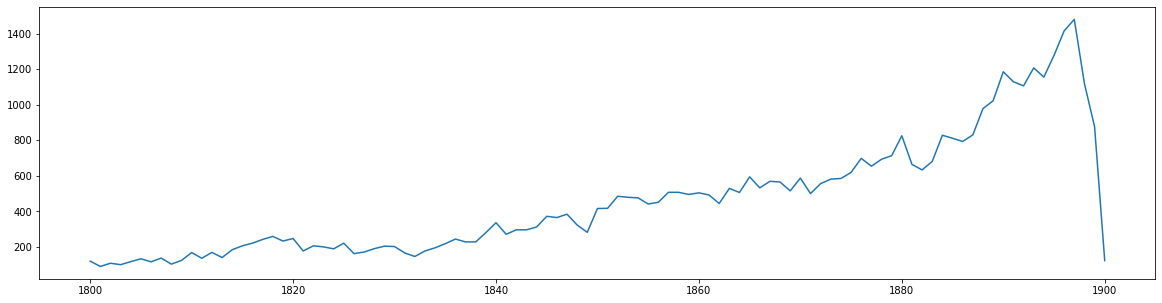

In [59]:
df_s['First year of pulication'].value_counts().sort_index().loc[1800:1900].plot(figsize=(20,5))

## 8.4 Additional Examples

An excellent and more complete introduction to Pandas is available online: [Python Data Science Handbook](
https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas.

We provide a few more examples of useful code for interrogating Pandas DataFrame. Please consult the book for more information.

- Select rows based on two or more conditions.

In [60]:
df_s[(df_s['First year of pulication'] > 1900) & (df_s['Languages'] != 'English')]

,Type of resource,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,...,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,BL record ID for physical resource,First year of pulication
BL record ID,,,,,,,,,,,,,,,,,,,,,
14804303,Monograph,"Aubert De La Faige, Geneste Émile",NaN,person,NaN,"La Boutresse, Roger de [person] ; Tiersonnier,...","Les Fiefs du Bourbonnais. La Palisse, etc. (Mo...",NaN,NaN,NaN,...,NaN,2 tomes (folio),NaN,Digital Store 10172.i.19,NaN,NaN,French,NaN,138105,1936
14804601,Monograph,"Barcelona, Concell de Cent",NaN,organisation,NaN,"Barcelona, Concell de Cent [organisation]",Manual de novells ardits vulgarment apellat Di...,NaN,Colecció de documents histórichs inedits de Ar...,NaN,...,NaN,17 volumes (8°),NaN,Digital Store 10161.eee.6,NaN,NaN,Spanish,NaN,196800,1922
14804602,Monograph,Arxiu Municipal Históric (Barcelona),NaN,organisation,NaN,Arxiu Municipal Históric (Barcelona) [organisa...,Colecció de documents histórichs inédits del A...,NaN,NaN,NaN,...,NaN,NaN,NaN,Digital Store 10161.eee.6,NaN,NaN,Spanish,Other volume are entered under the authers names,196839,1922
14809508,Monograph,"Dubois, Marcel, Maître à l'Ecole normale supér...",NaN,person,NaN,"Guy, Camille [person] ; Dubois, Marcel, Maître...",Album géographique [With illustrations.],NaN,NaN,NaN,...,NaN,5 volumes (4°),NaN,Digital Store 10002.i.5,NaN,NaN,French,NaN,991243,1906
14815227,Monograph,"Kirchhoff, Alfred",NaN,person,NaN,"Kirchhoff, Alfred [person]",Unser Wissen von der Erde. Allgemeine Erdkunde...,NaN,NaN,NaN,...,NaN,4 Band (8°),NaN,Digital Store 10001.g.6,NaN,NaN,German,NaN,1974431,1907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15742966,Monograph,"Milyukov, Pavel Nikolaevich",NaN,person,NaN,"Milyukov, Pavel Nikolaevich [person]",Очерки по исторіи Русской Культуры ... 3-е изд...,NaN,NaN,NaN,...,NaN,3 част (8°),NaN,Digital Store 9454.g.37,NaN,NaN,Russian,Част. 2 is of the 2nd edition and част. 3 is i...,2503123,1903
15742968,Monograph,"Morselli, Enrico",NaN,person,NaN,"Vigo, G. B. [person] ; Raverdino, G. [person] ...",Antropologia generale. Lezioni su l'uomo secon...,NaN,NaN,NaN,...,NaN,"xxxi, 1395 pages (8°)",NaN,Digital Store 10007.v.5,NaN,NaN,Italian,NaN,2558177,1911
16285845,Monograph,"Rae, Milne, Mrs",1844-1933,person,NaN,"Rae, Milne, Mrs, 1844-1933 [person]",Bride Lorraine,NaN,NaN,NaN,...,NaN,192 pages,NaN,NaN,NaN,NaN,NaN,NaN,3028314,1912


In [61]:
df_s[(df_s['First year of pulication'] > 1900) & (df_s['Languages'] == 'German')]['Title']

BL record ID
14815227    Unser Wissen von der Erde. Allgemeine Erdkunde...
14823900                          Russland in Asien. Bd. 1-11
14847330    Versuch über die Ungleichheit der Menschenrace...
14861142    Weltgeschichte ... Dritte verbesserte Auflage....
14867365    Geschichte der Stadt Pressburg ... Herausgegeb...
14867456    Die Geschichte Husums im Rahmen der Geschichte...
14867692    Das Bisthum Augsburg, historisch und statistis...
14867824    Die Gemeinde-Verwaltung der Reichshaupt und Re...
14867867    Kulmbach und die Plassenburg in alter und neue...
14871193               Nordische Fahrten. Skizzen und Studien
14891317    Geschichte des Königreichs Hannover, etc. 2 Tl...
14891669    Die Berner Chronik des Diebold Schilling, 1468...
14896011    Oesterreichischer Erbfolge-Krieg 1740-1748. Na...
14896217    Die Könige der Germanen. Das Wesen des älteste...
14896882                     Fürst Bismarck und der Bundesrat
14897057    Monographien zur deutschen Kulturgeschichte, 

- Compare subsections of the corpus and plot a timeline.

In [62]:
df_en = df_s[df_s.Languages=='English']
df_de = df_s[df_s.Languages=='German']

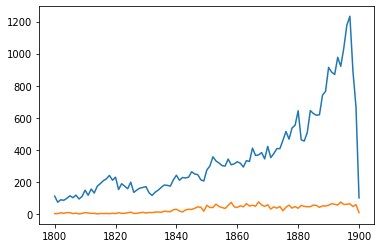

In [63]:
df_en['First year of pulication'].value_counts().sort_index().loc[1800:1900].plot()
df_de['First year of pulication'].value_counts().sort_index().loc[1800:1900].plot()

- Plot the prevalence of words over time.

In [64]:
import re
pattern = re.compile(r'\bwoman\b|\bwomen\b',flags= re.I)

In [65]:
pattern.findall('Women woman bwomena')

['Women', 'woman']

In [66]:
def in_title(title,pattern):
    return bool(pattern.findall(str(title)))

- Use `.apply()` with an additional keyword argument.

In [67]:
df_s['travel'] = df_s.Title.apply(in_title,pattern=pattern)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


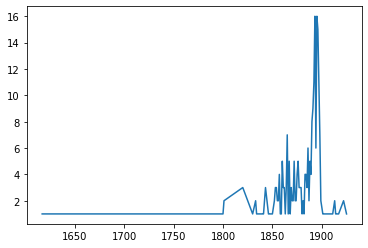

In [68]:
df_s[df_s['travel'] == True]['First year of pulication'].value_counts().sort_index().plot()

# Fin.